In [19]:
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
from scipy import signal
import seaborn as sns
import os
from sklearn.cluster import KMeans
import numpy as np

In [194]:
old_f = scipy.io.loadmat('../dictator_game_SUAdata_pre.mat')

In [3]:
file_name = []
unit_num = []
for i in range(old_f['all_spike_time'].shape[1]):
    unit_num.append(old_f['all_spike_time'][0, i]['data'][0, 0].shape[1])
    file_name.append(old_f['all_spike_time'][0, i]['filename'][0, 0][0, 0][0].replace('.mda', ''))

In [4]:
# Open spiketrain information for newly sorted
f = scipy.io.loadmat('spiketimes.mat')

'acc_1_Hitch_01092017' is not in list acc_1_Hitch_01092017
'acc_1_Hitch_Cop_082516_part2' is not in list acc_1_Hitch_Cop_082516_part2
'acc_Hitch_01272017' is not in list acc_Hitch_01272017


<ipython-input-13-1d5ae07a1217>:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(10,10))


'bla_1_Hitch_01042017' is not in list bla_1_Hitch_01042017
'bla_1_Hitch_01052016' is not in list bla_1_Hitch_01052016
'bla_Hitch_02022017' is not in list bla_Hitch_02022017
'bla_Hitch_coppola_09172016' is not in list bla_Hitch_coppola_09172016
'bla_kuro_052317' is not in list bla_kuro_052317
'bla_kuro_06032017' is not in list bla_kuro_06032017


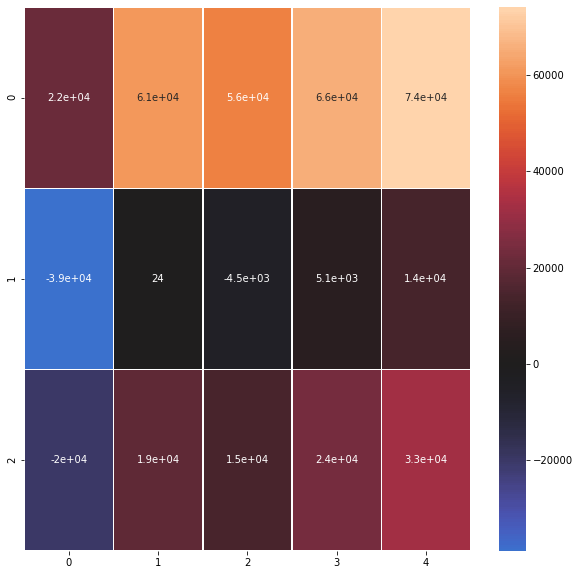

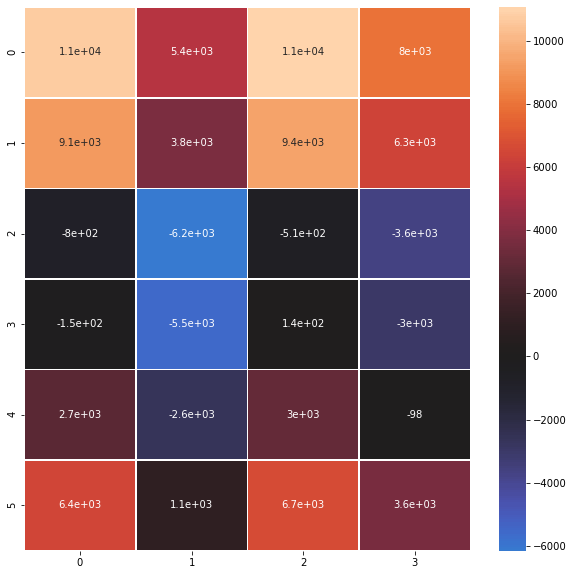

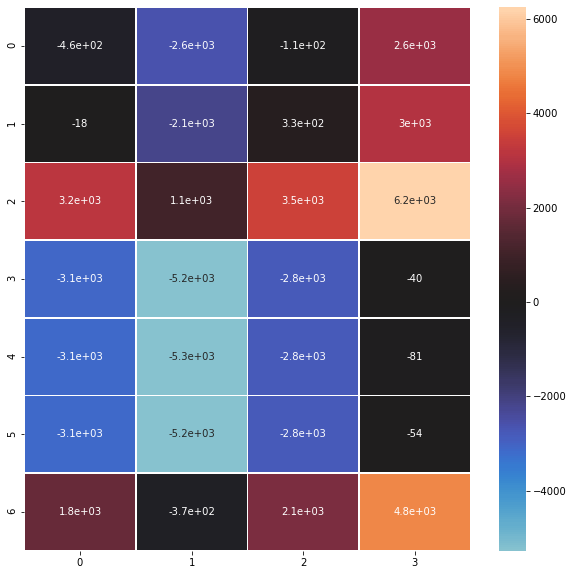

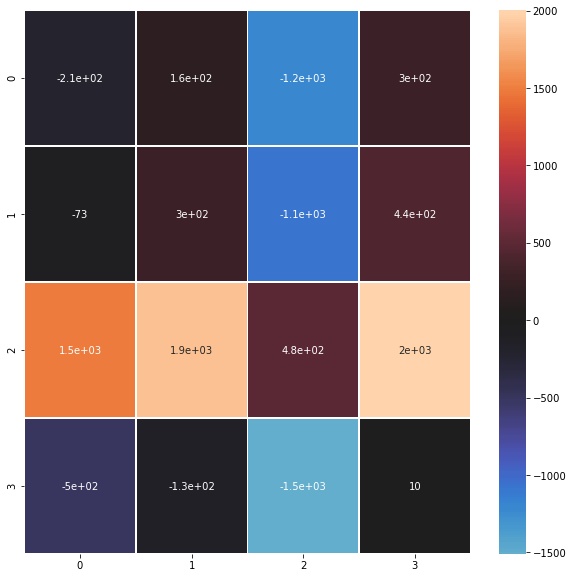

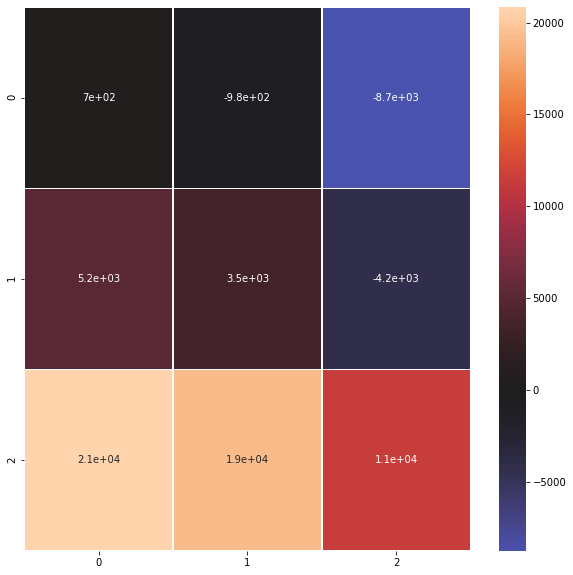

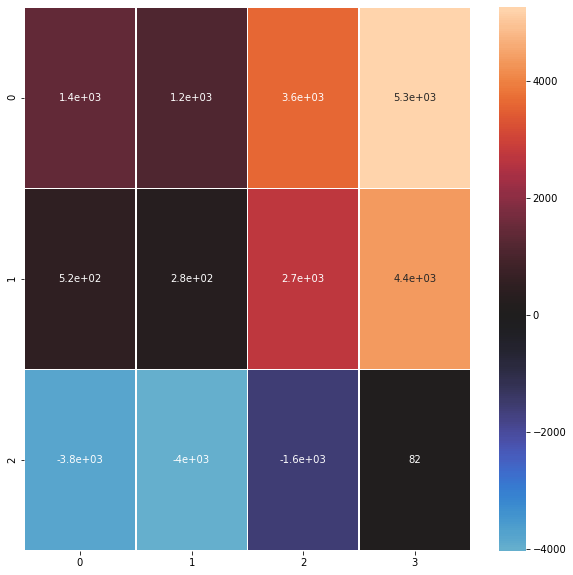

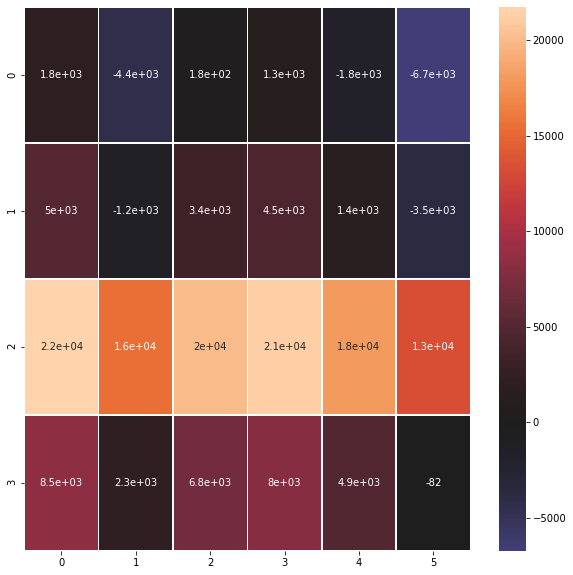

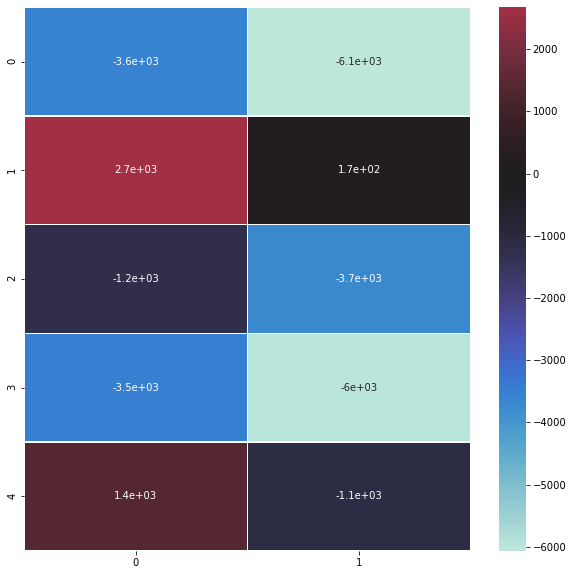

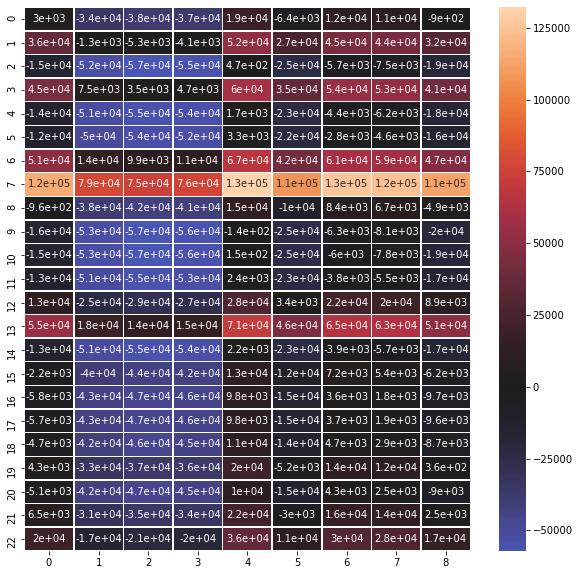

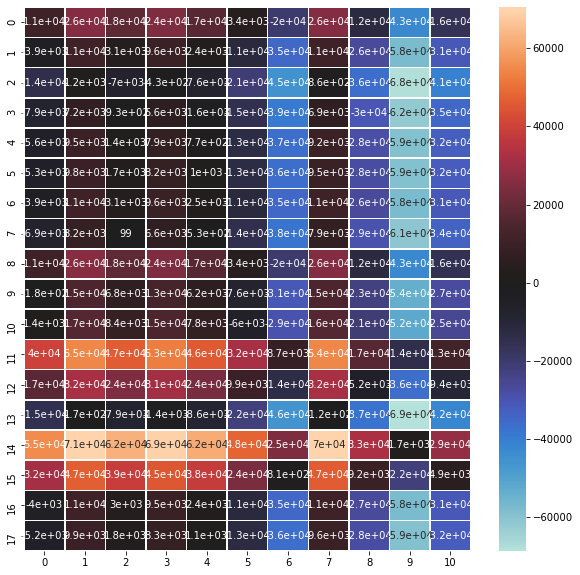

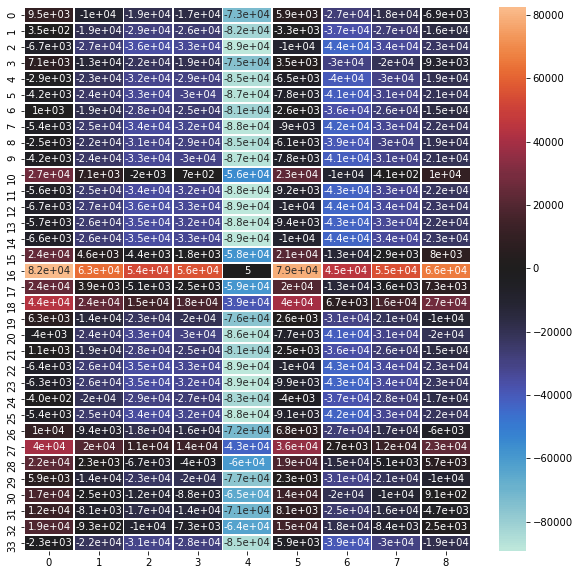

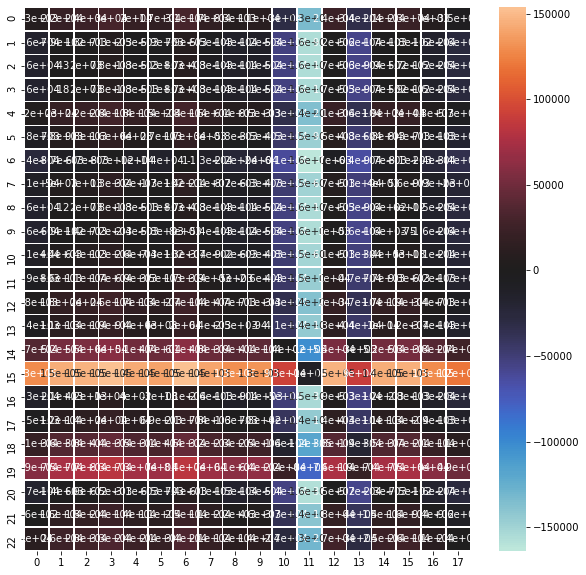

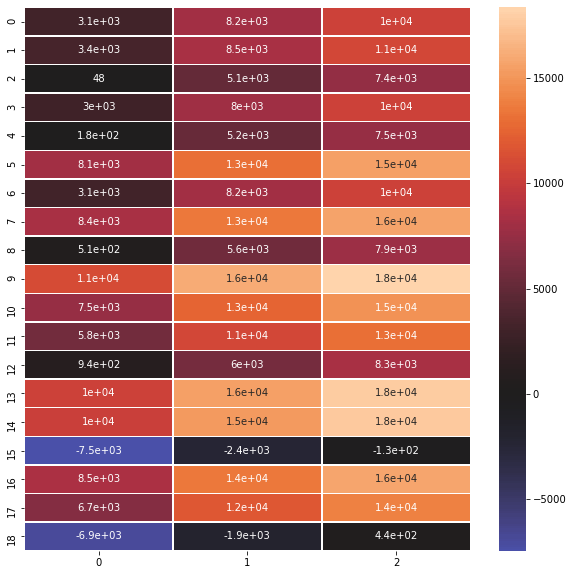

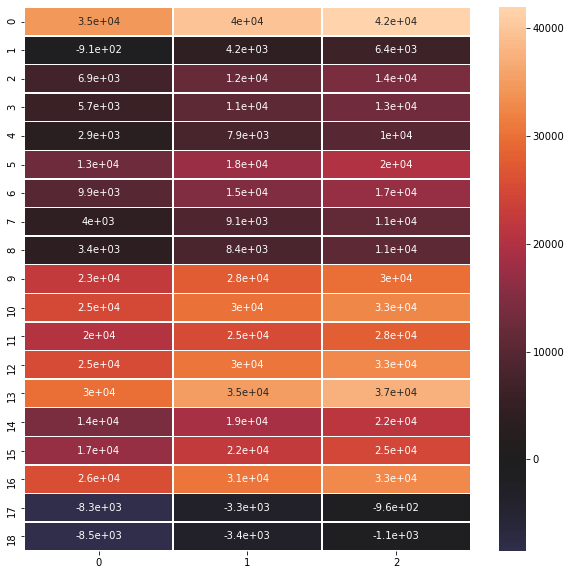

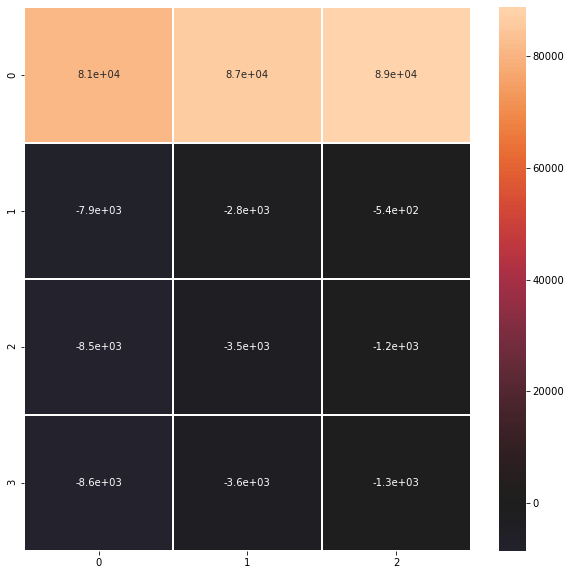

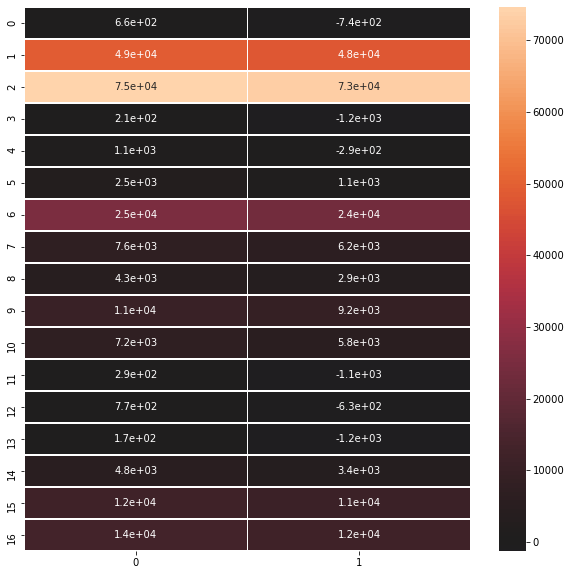

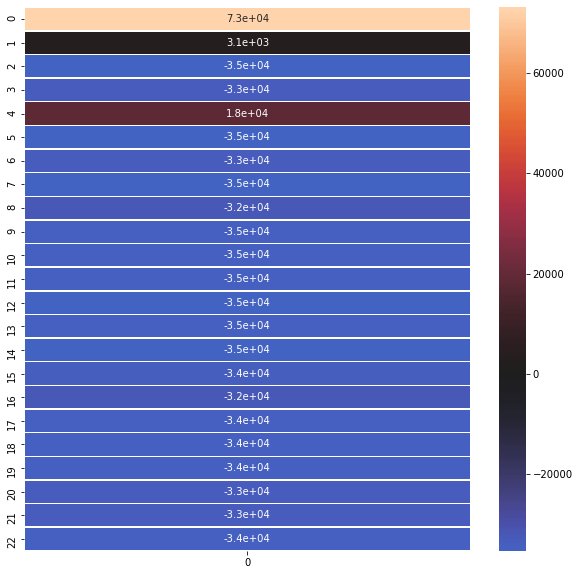

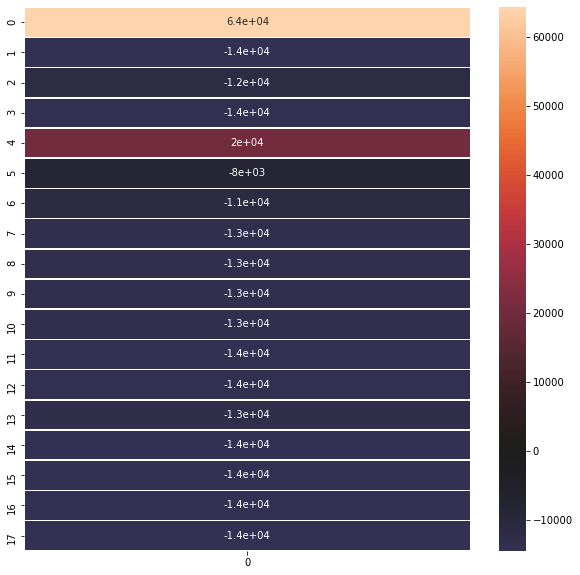

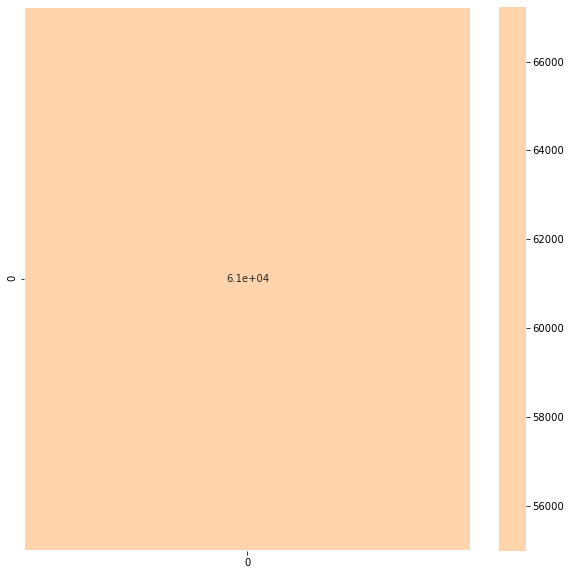

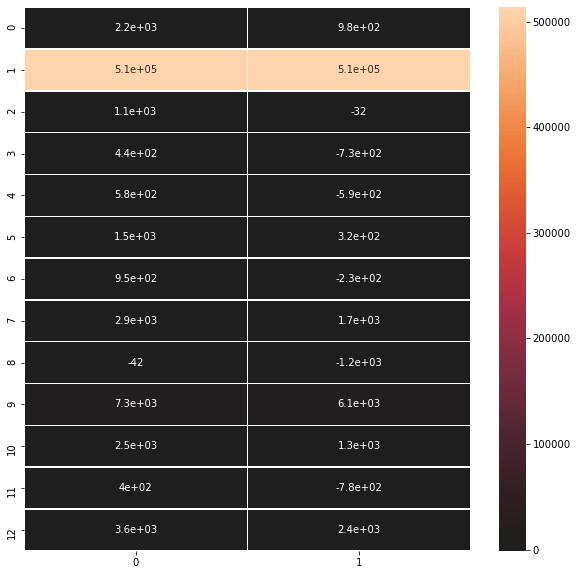

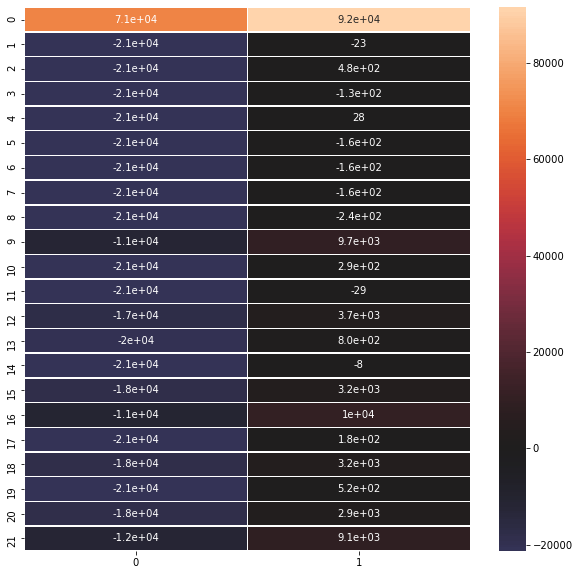

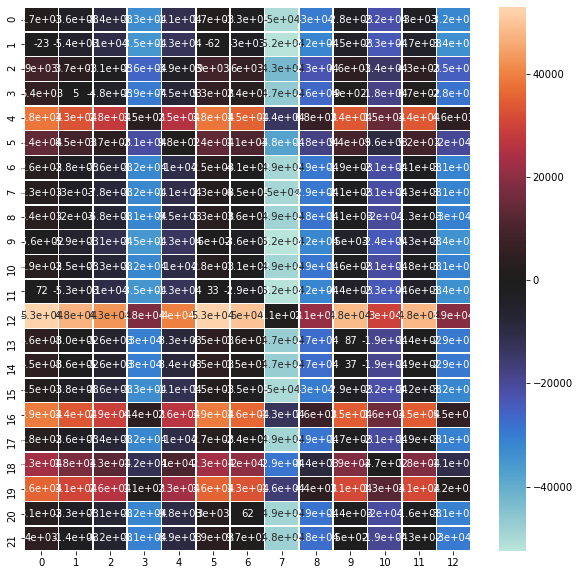

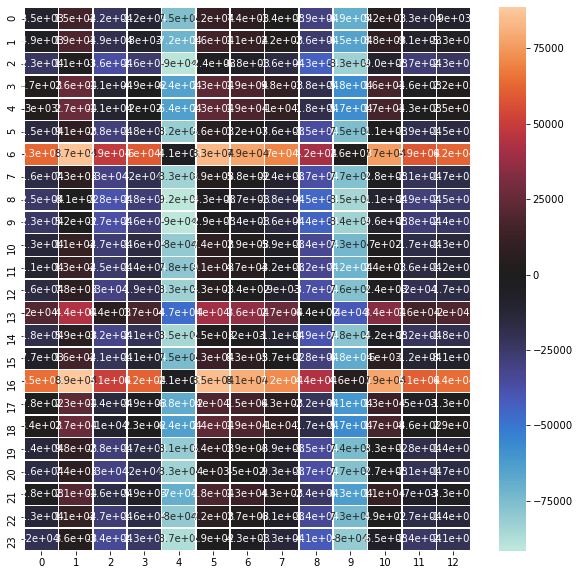

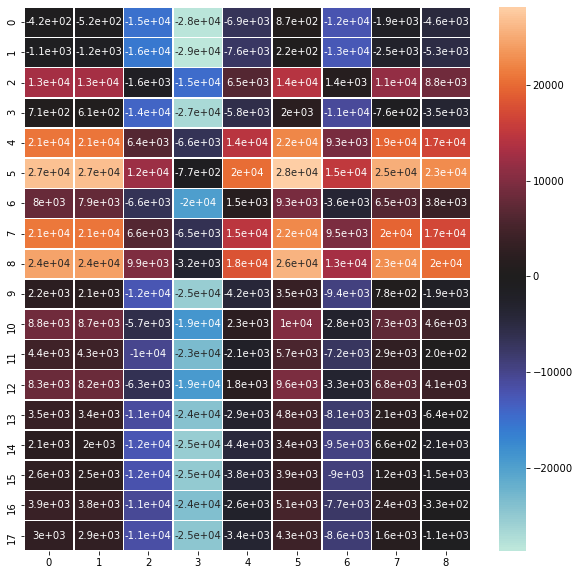

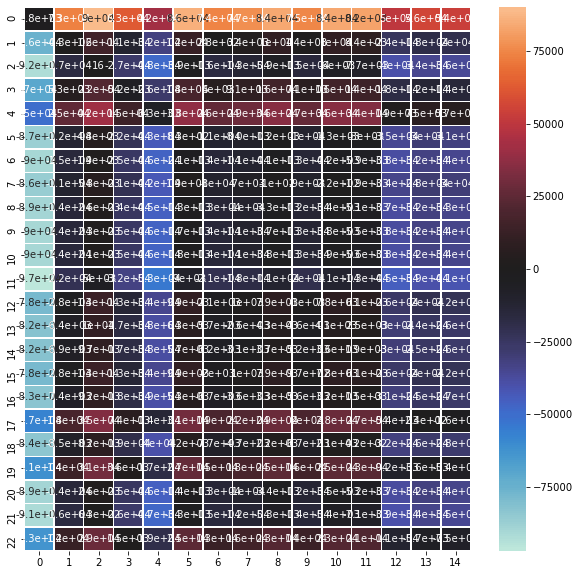

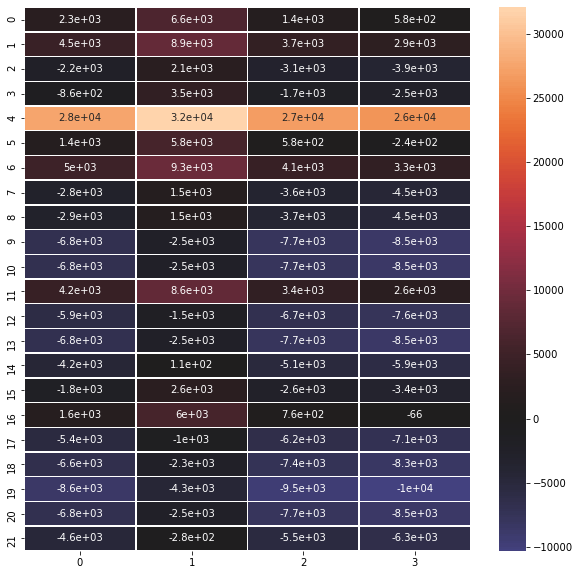

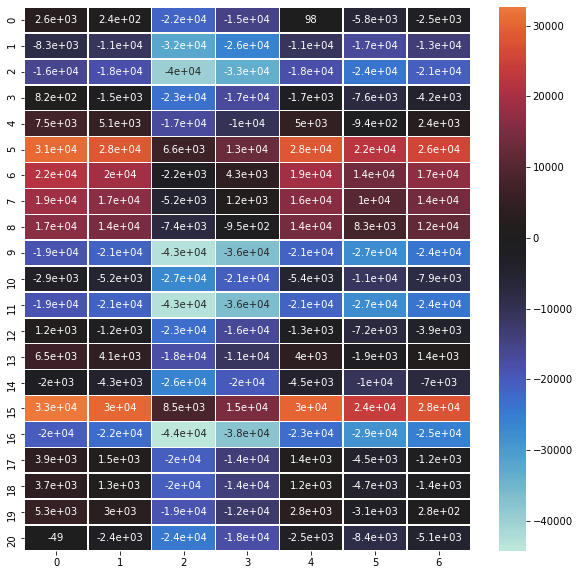

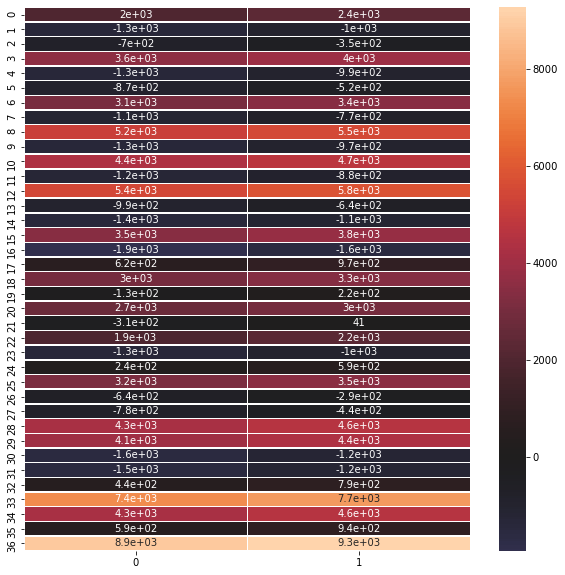

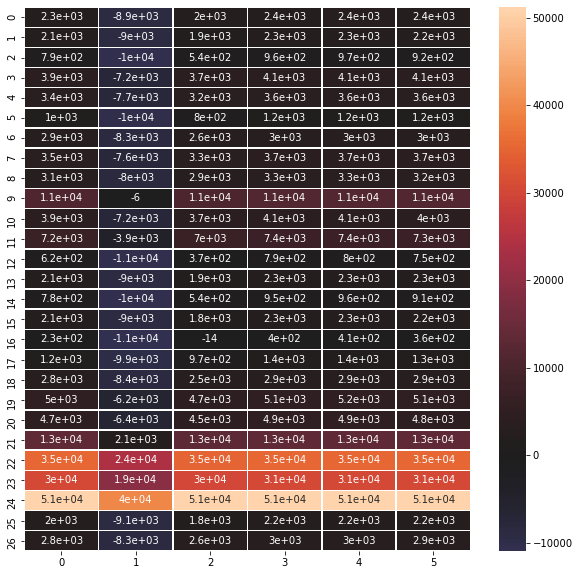

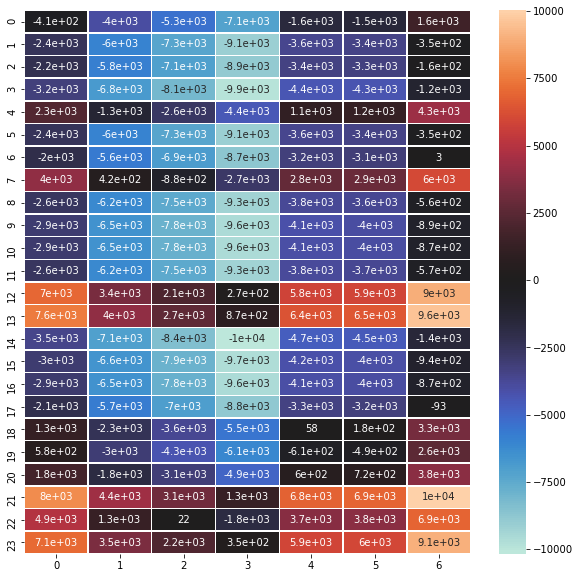

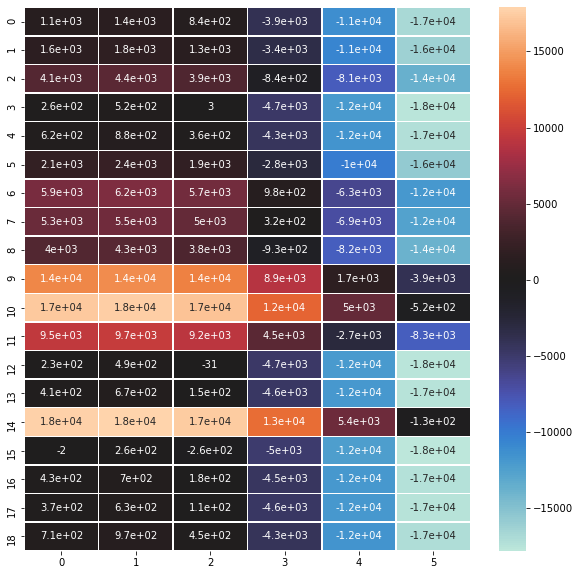

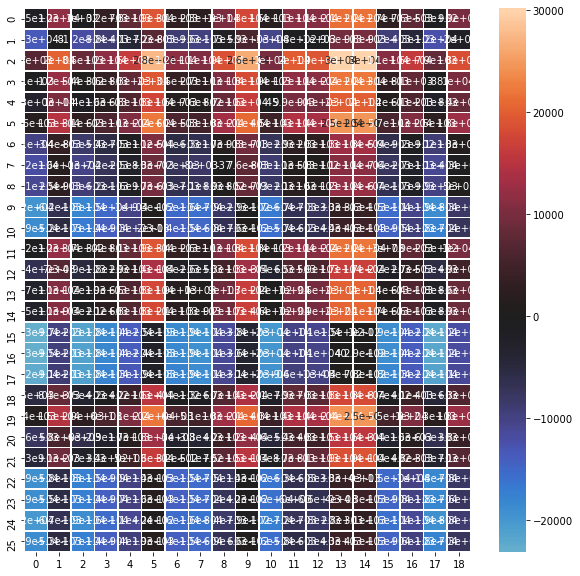

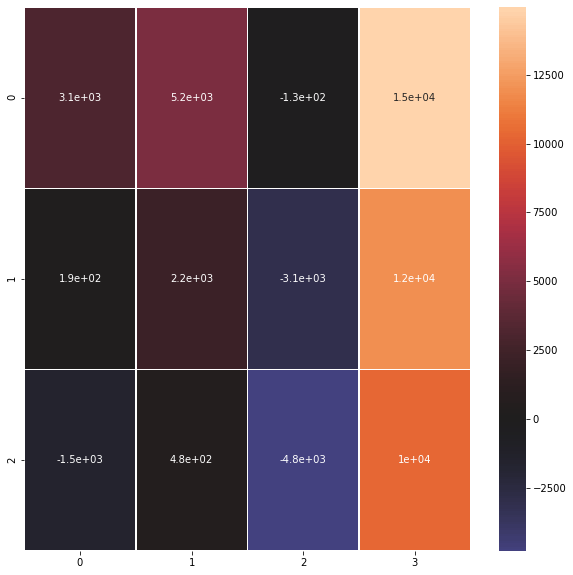

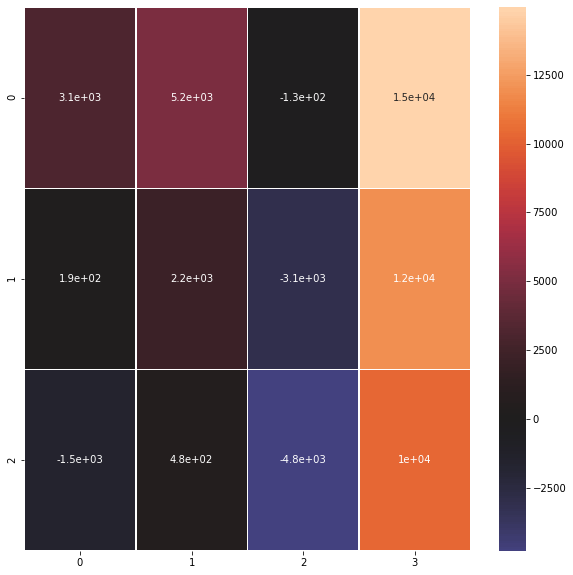

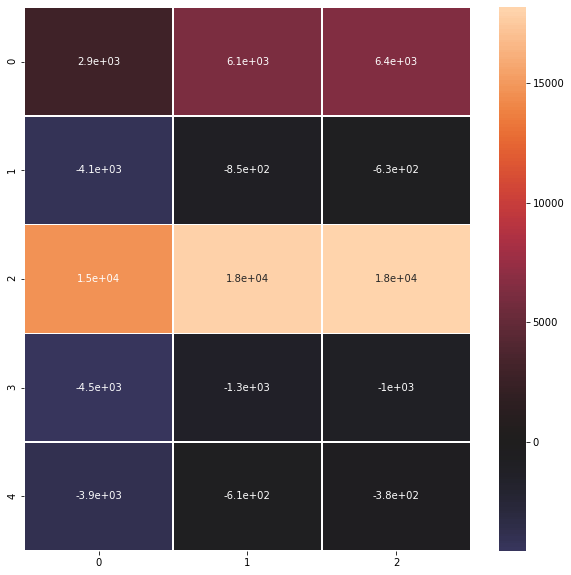

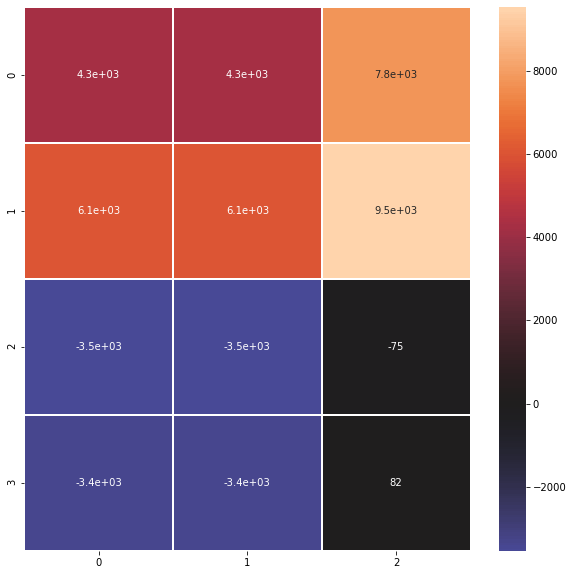

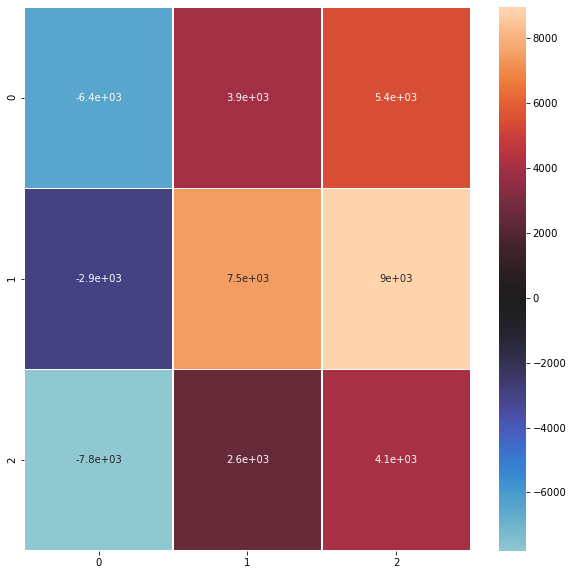

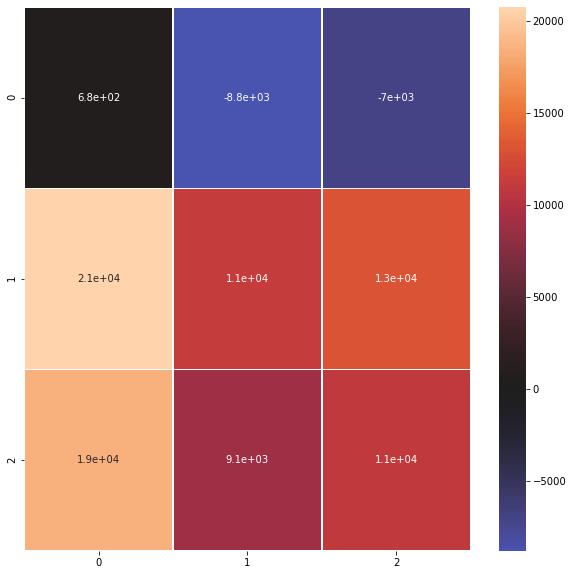

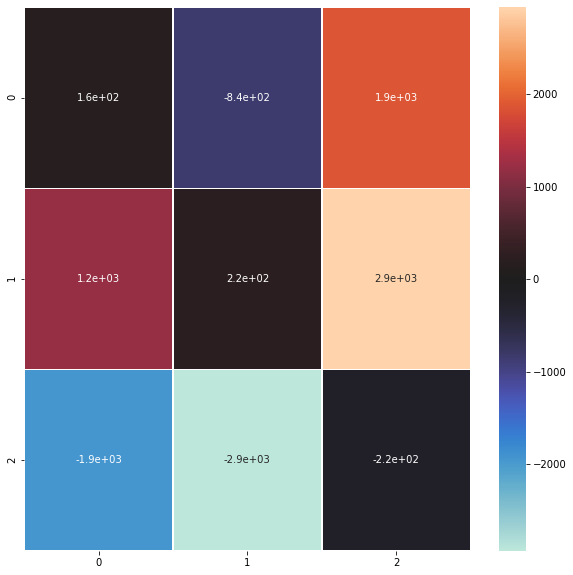

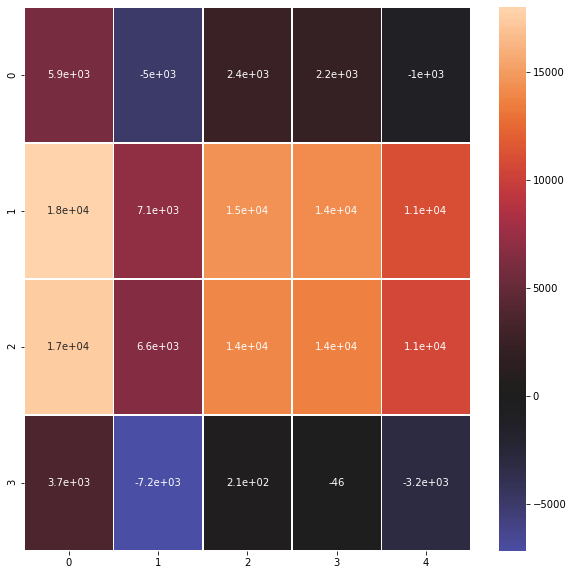

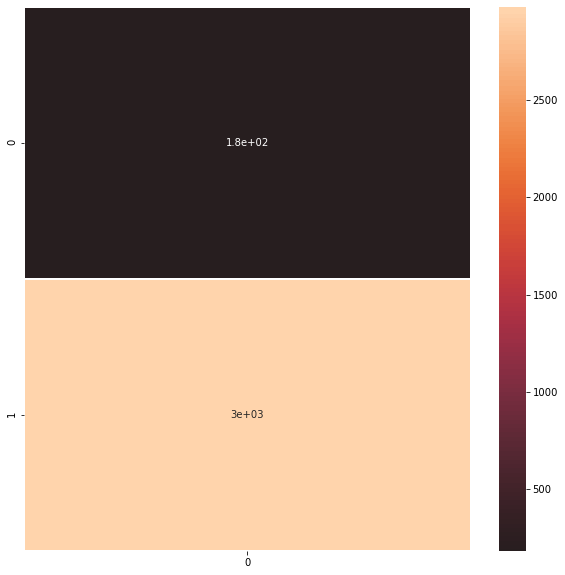

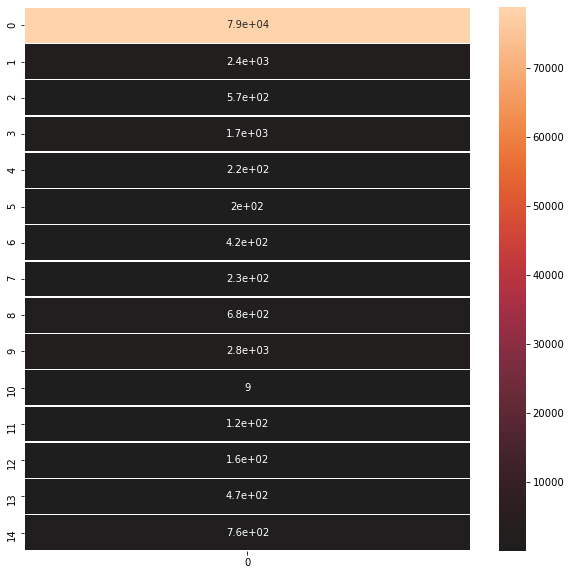

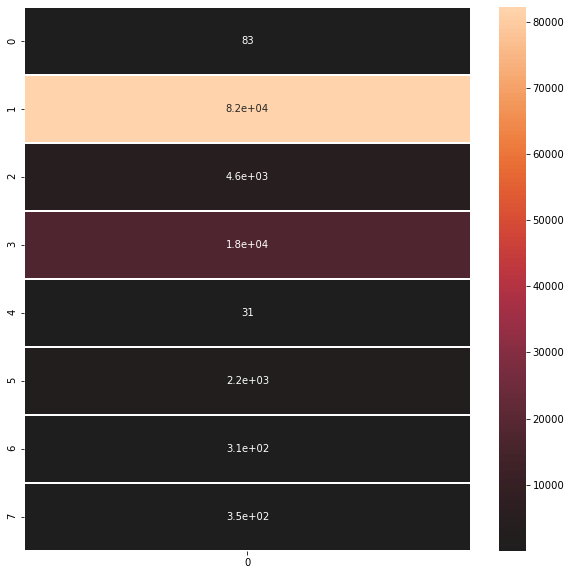

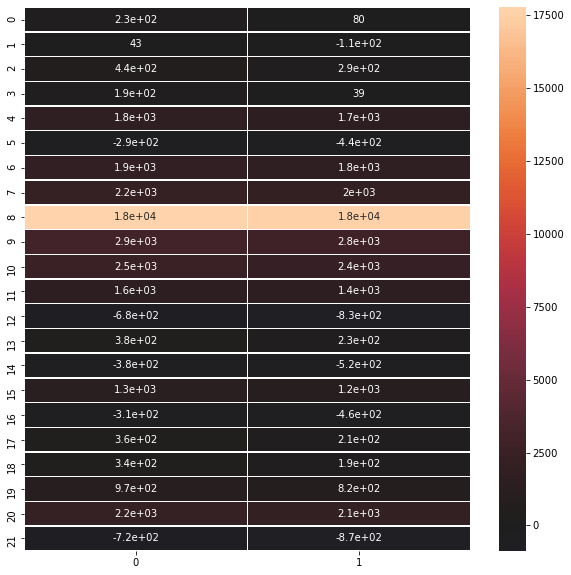

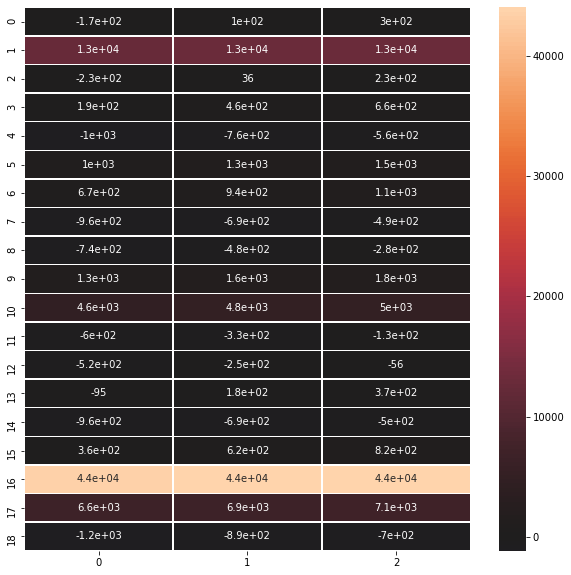

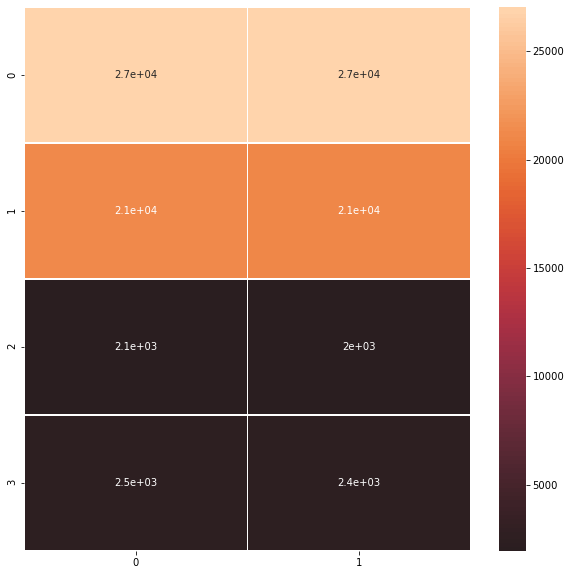

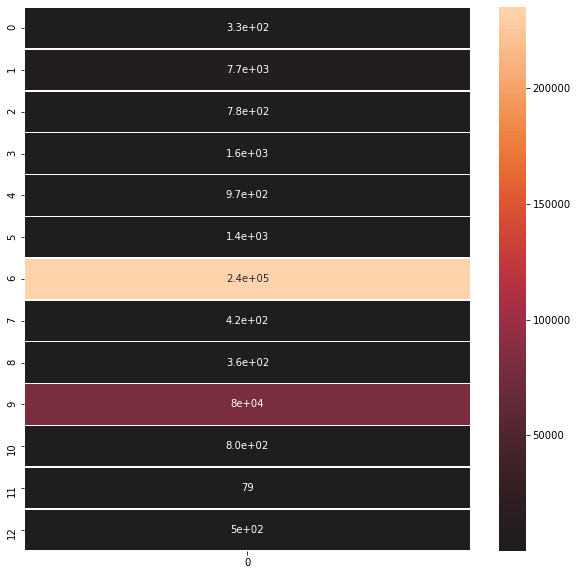

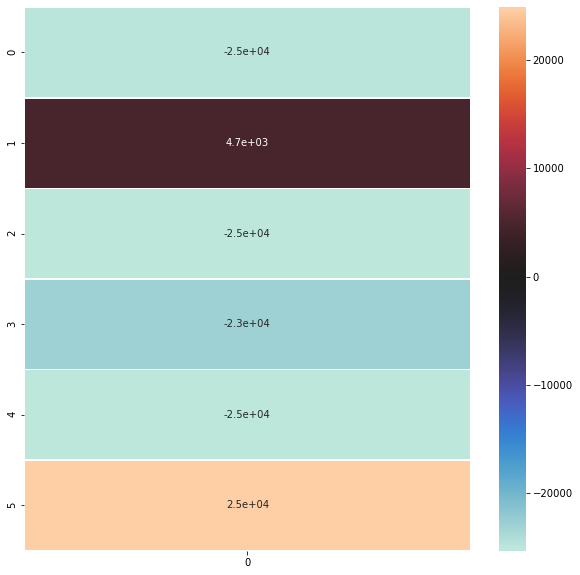

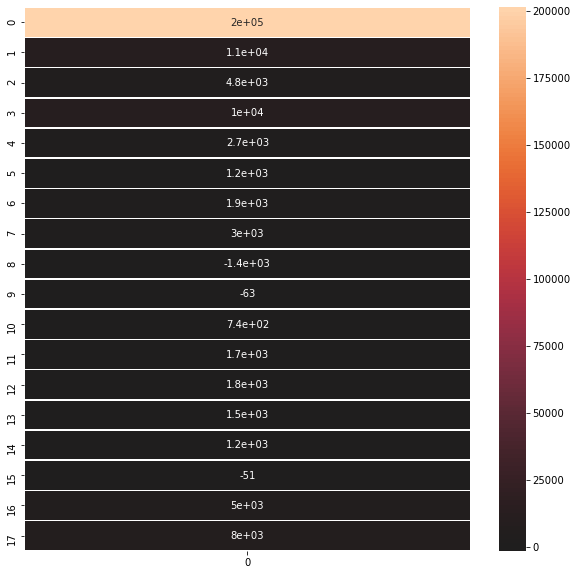

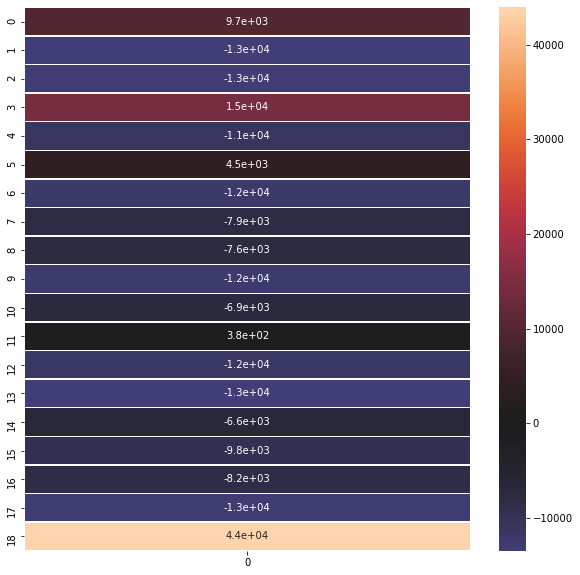

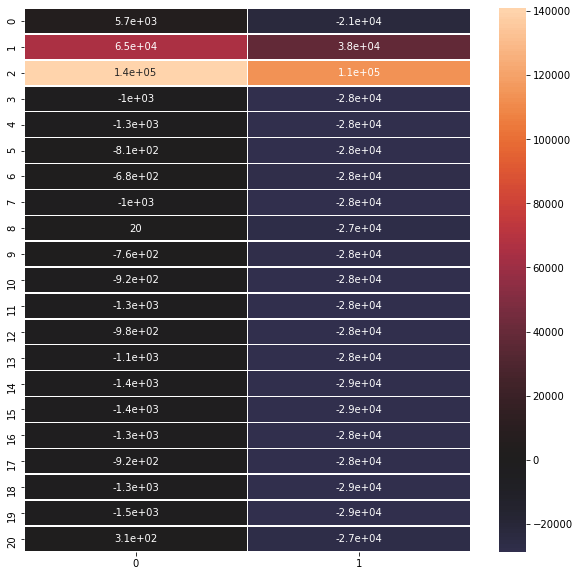

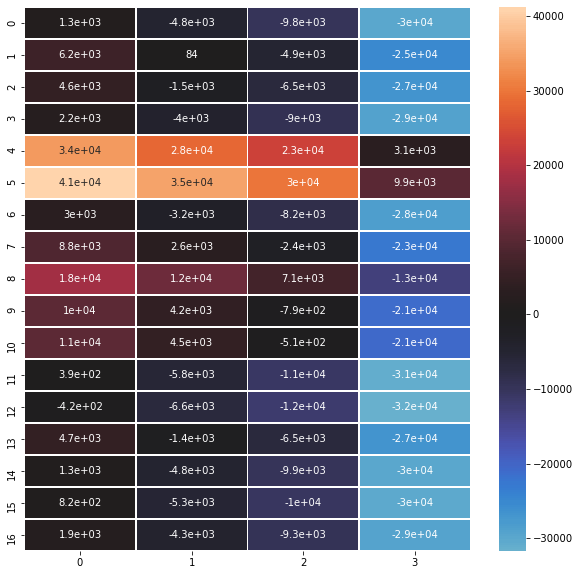

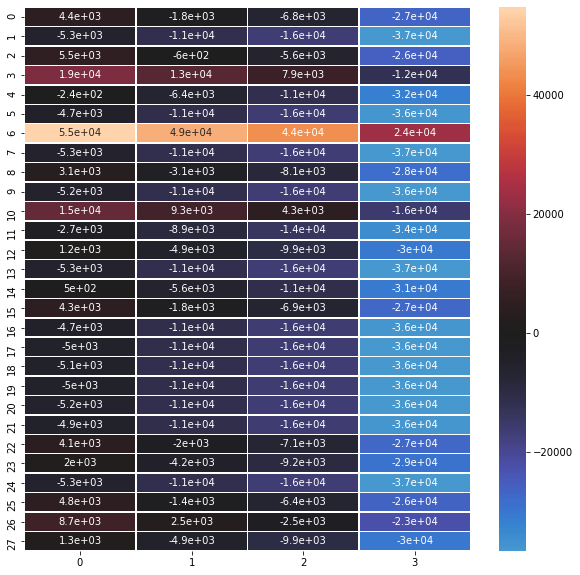

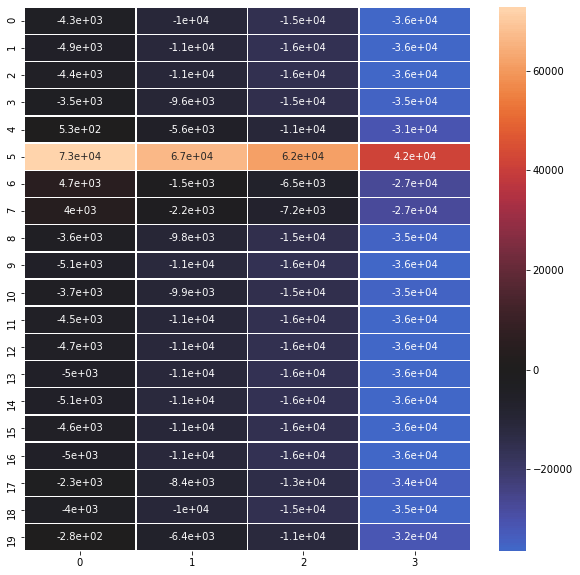

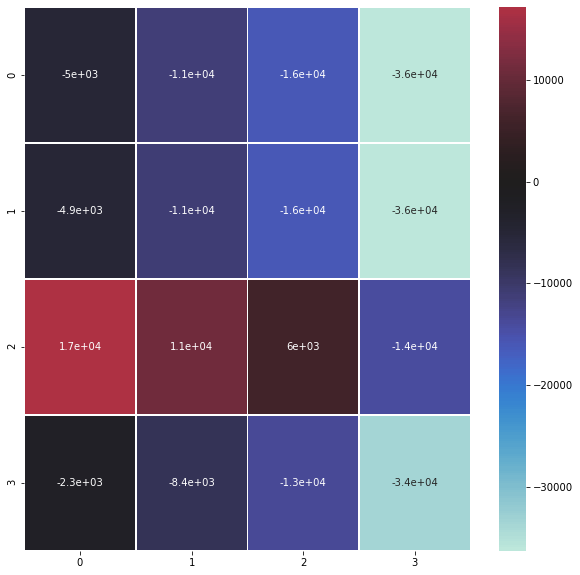

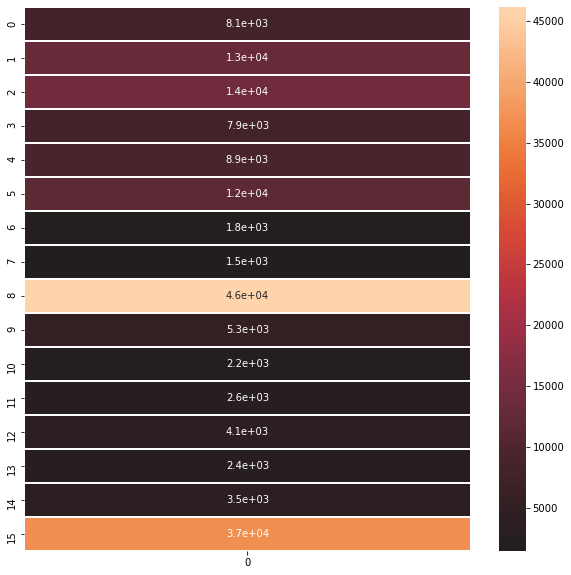

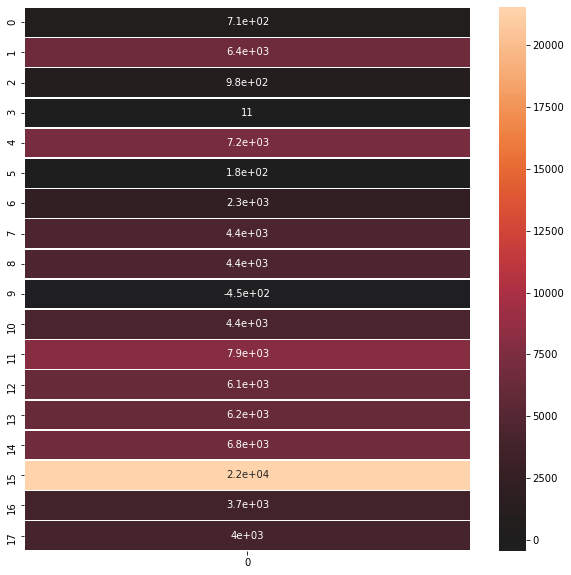

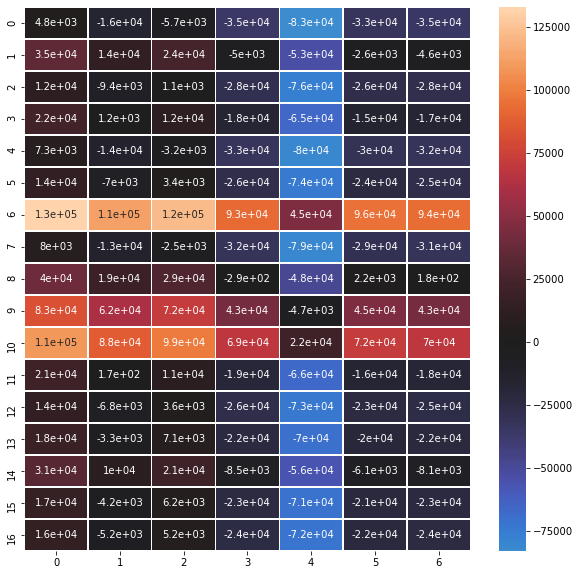

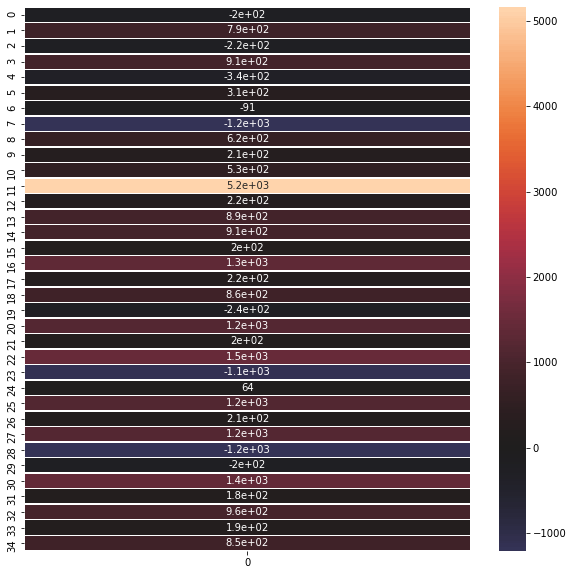

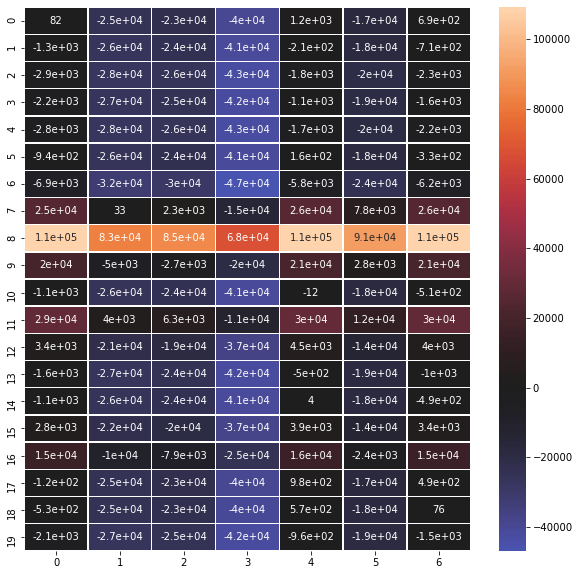

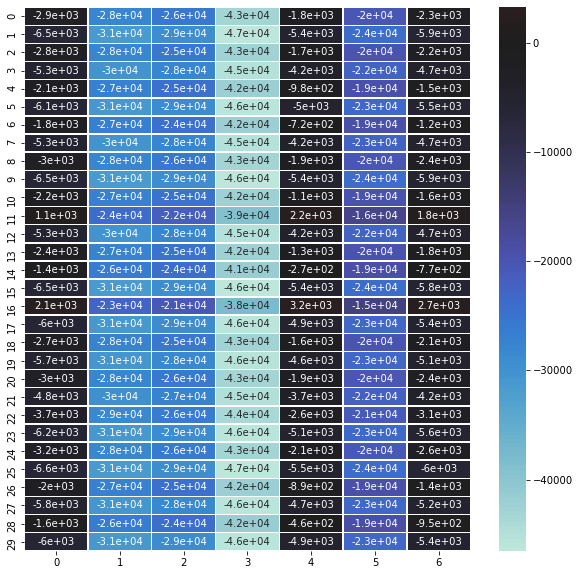

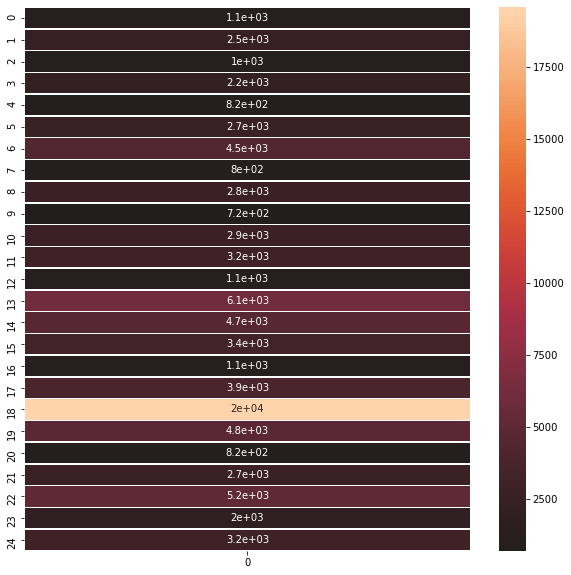

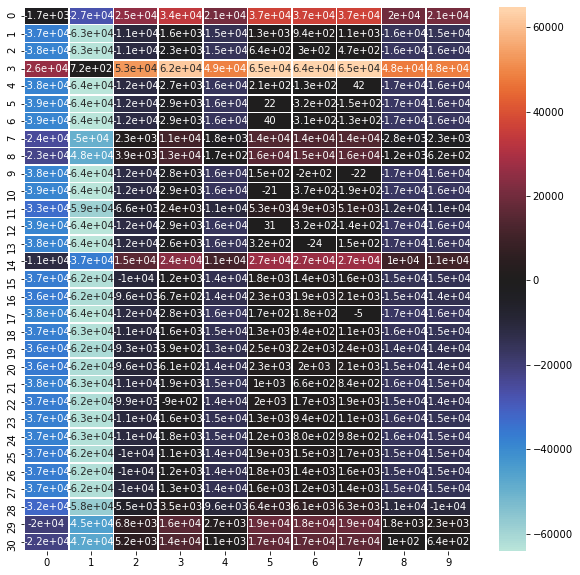

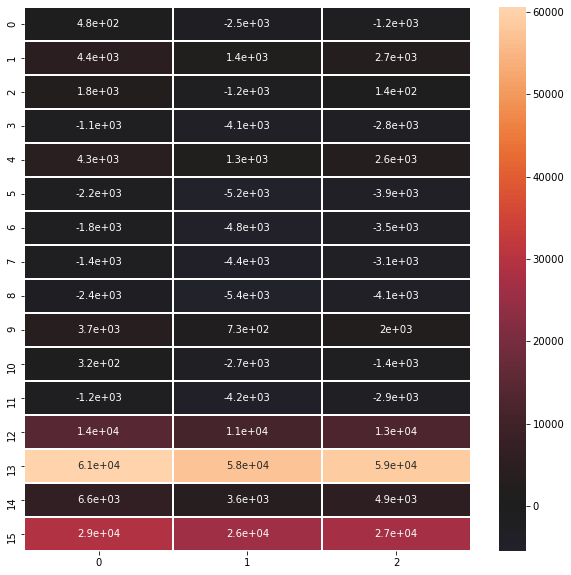

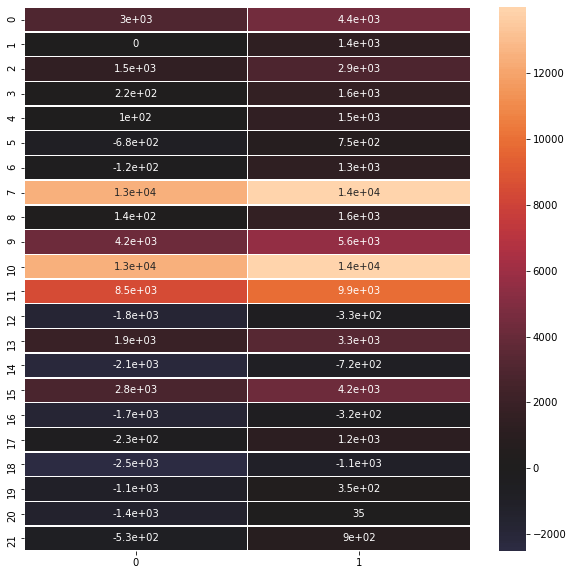

In [13]:
# For all recording files
for i in range(len(f['all_spiketimes'][0])):
    f_name = f['all_spiketimes'][0, i][0][1][0]
    units = len(f['all_spiketimes'][0, i][0][0][0])
    try:
        ind = file_name.index(f_name)
    except Exception as e:
        print(e, f_name)
    # spk_old = []
    spike_ct_old = []
    comp_matrix = []
    for j in range(unit_num[ind]):
    #   spk_old.append(old_f['all_spike_time'][0, ind]['data'][0, 0][0, j]['data'][0, 0][0])
        spike_ct_old.append(old_f['all_spike_time'][0, ind]['data'][0, 0][0, j]['data'][0, 0][0].size)
    #  for all units in recording file
    for j in range(units):
        # f['all_spiketimes'][0, i][0][0][0][j][0] is the spike train for a unit and getting length for spike count
        spike_ct = (len(f['all_spiketimes'][0, i][0][0][0][j][0]))
        comp_matrix.append([(spike_ct - ct)for ct in spike_ct_old])
    fig, ax = plt.subplots(figsize=(10,10))
    ax = sns.heatmap(comp_matrix, center = 0, annot = True, linewidths=.5, ax=ax)
    output_dir = "waveform_visualization/comparisons/" + f_name
    if not os.path.exists(output_dir):
        os.mkdir(output_dir)
    fig.savefig('waveform_visualization/comparisons/' + f_name + '/spike_ct_comparison.png')

In [207]:
spk_old = []
i = 3
unit_num = (old_f['all_spike_time'][0, i]['data'][0, 0].shape[1])
units = len(f['all_spiketimes'][0, i][0][0][0])
print(units, unit_num)

4 4


In [209]:
for j in range(unit_num):
    spk_old.append(old_f['all_spike_time'][0, i]['data'][0, 0][0, j]['data'][0, 0][0])

In [15]:
units_add = [0]
f_names = []
spike_trains = []
for i in range(len(f['all_spiketimes'][0])):
    last_unit = units_add[-1]
    units = len(f['all_spiketimes'][0, i][0][0][0])
    units_add.append(last_unit + units)
    f_names.append(f['all_spiketimes'][0, i][0][1][0])
    for j in range(units):
        spike_trains.append(f['all_spiketimes'][0, i][0][0][0][j][0])

bla_Kuro52517


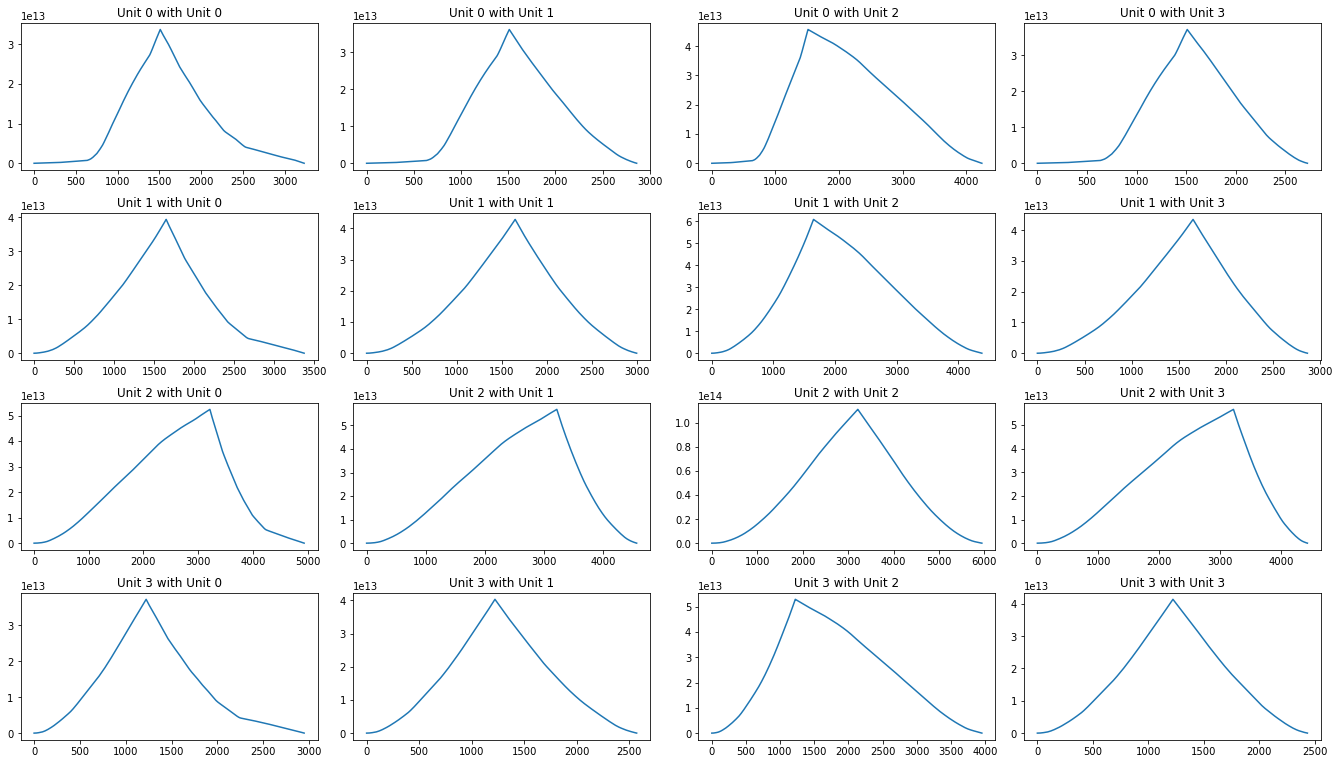

In [232]:
fig, axs = plt.subplots(units, unit_num, constrained_layout = True) 
fig.set_size_inches(18.5, 10.5)
for j in range(units):
    spike_train = f['all_spiketimes'][0, i][0][0][0][j][0]
    for k in range(unit_num):
        corr = signal.correlate(spike_train, spk_old[k])
        axs[j][k].plot(corr)
        axs[j][k].set_title('Unit ' + str(j) + ' with Unit ' + str(k))
fig.savefig('waveform_visualization/' + f_name + '_correlation.png')    
print(f_name)

In [223]:
from scipy.stats import pearsonr 
import numpy as np 


a = [ 0, 0.4, 0.2, 0.4, 0.2, 0.45, 0.2, 0.52, 0.52, 0.4, 0.21, 0.2, 0.4, 0.51]
b = [ 0.4, 0.2, 0.5]


df = pd.DataFrame(dict(x=spk_old[0]))

CORR_VALS = np.array(spike_train)
def get_correlation(vals):
    return pearsonr(vals, CORR_VALS)[0]

df['correlation'] = df.rolling(window=len(CORR_VALS)).apply(get_correlation)

4


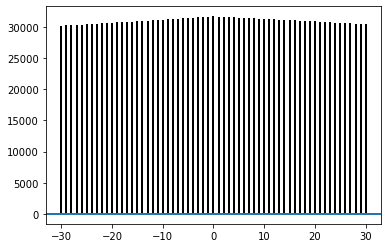

In [259]:
i = 3
j = 4
spike_train = f['all_spiketimes'][0, i][0][0][0][0][0]
units = len(f['all_spiketimes'][0, i][0][0][0])
print(units)
tot_len = len(spike_train) if len(spike_train) < len(spk_old[j]) else len(spk_old[j])
plt.xcorr(spk_old[j][:tot_len], spike_train[:tot_len], usevlines=True, maxlags=30, lw=2)
plt.show()

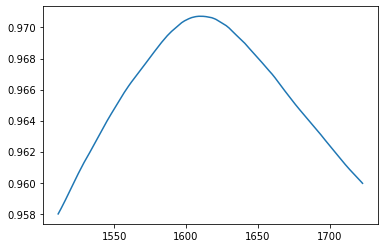

In [231]:
plt.plot(df.dropna()['correlation'])

In [249]:
print(len(spike_train), len(spk_old[1][:1512]))

1512 1350


In [217]:
len(corr)

2435

In [218]:
k2, p = stats.normaltest(corr)
alpha = 1e-3
print("p = {:g}".format(p))
p = 3.27207e-11
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0
The null hypothesis can be rejected


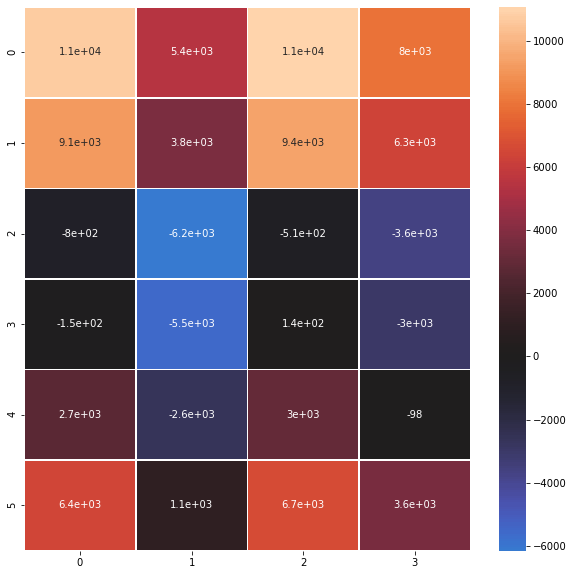

In [12]:

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(comp_matrix, center = 0, annot = True, linewidths=.5, ax=ax)
output_dir = "waveform_visualization/comparisons/" + f_name
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
fig.savefig('waveform_visualization/comparisons/' + f_name + '/spikect_comparison.png')
